# Credit Card Fraud Detection 💳

<img src='../../images-library/computer-security-lock-and-payment.jpg'>
          
Photo by <a href="https://burst.shopify.com/@ndekhors?utm_campaign=photo_credit&amp;utm_content=Free+Stock+Photo+of+Computer+Security+Lock+And+Payment+%E2%80%94+HD+Images&amp;utm_medium=referral&amp;utm_source=credit">Nicole De Khors</a> from <a href="https://burst.shopify.com/technology?utm_campaign=photo_credit&amp;utm_content=Free+Stock+Photo+of+Computer+Security+Lock+And+Payment+%E2%80%94+HD+Images&amp;utm_medium=referral&amp;utm_source=credit">Burst</a>


## Objectives 🚀

Identify fraudulent credit card transactions 💳.


## Context

Fraud detection is a billion dollars business 💰: according to the [Nilson Report](https://nilsonreport.com/), credit card fraud adds up to 24 billion dollars in 2018 ! 

Every bank and insurance company has some fraud detection algorithms. They are working hard to find out the fraudulent transactions amongst a huge number of valid ones.

Some companies are doing really good. For instance, Paypal has developed really complicated and efficient algorithms to perform fraud detection.


## Dataset

📥 I download the dataset on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284 807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. The only features which have not been transformed with PCA are `Time` and `Amount`:
- Features `V1`, `V2`, … `V28` are the principal components obtained with PCA
- Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature `Amount` is the transaction Amount (euros), this feature can be used for example-dependant cost-senstive learning. 
- Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise

<h1> Import

In [8]:
#System library
import os

#Data manipulation
import pandas as pd, numpy as np

#Data storage
import pickle

#Data visualization
import matplotlib.pyplot as plt, seaborn as sns
#from mpl_toolkits import mplot3d                                                          #3D visualization
#%matplotlib notebook

#Data Preprocessing
from sklearn.preprocessing import StandardScaler                                           #Data scaling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV     #Data split and hyperparameter                       
from imblearn.over_sampling import SMOTE                                                   #Data oversampling

#Supervised Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Unsupervised Machine Learning Model
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#Metrics computed for Classification
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve

I load my dataset in a dataframe :

In [7]:
#Define dataset path :
filepath = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard.csv')

In [8]:
#Load csv file with pandas dataframe
creditcard = pd.read_csv(filepath)
creditcard.shape

(284807, 31)

In [9]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h1> 1. Exploration Data Exploration

<h2> 1.1 Data Cleaning 

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


I have continue values in my dataset but my target (`Class`) is discrete values : It's a Supervised Machine Learning case. I have some relevant informations on :
- `Amount` mean = 88€
- `Amount` max = 25 691€
- `Time` max = 172 792s (i.e. 48h)

I haven't null values.

In [7]:
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

I drop duplicates in my dataframe because they are useless :

In [10]:
creditcard.duplicated().sum()

1081

In [11]:
creditcard.drop_duplicates(inplace=True)
creditcard.shape

(283726, 31)

In [12]:
creditcard.duplicated().sum()

0

In [13]:
#I save creditcard dataframe in local file
filepath_creditcard_data = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard.pkl')

with open(filepath_creditcard_data, 'wb') as f:
    pickle.dump(creditcard, f)

<h2> 1.2 Data Analysis

In [14]:
#I import creditcard dataframe from local file
filepath_creditcard_data = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard.pkl')

with open(filepath_creditcard_data, 'rb') as f:
    creditcard = pickle.load(f)

In [15]:
creditcard.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3> Fraudulent/Non-fraudulent transactions distribution :

The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions :

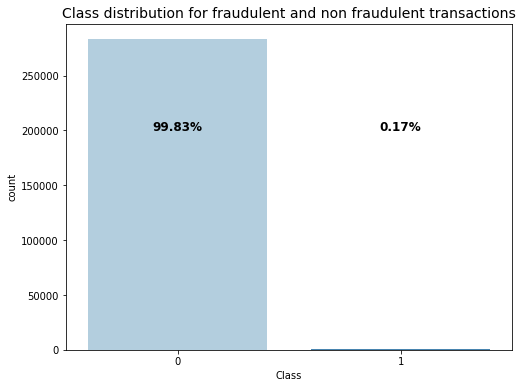

In [50]:
plt.figure(figsize=(8, 6))

#Plot the Class distributions for fraudulent and non fraudulent transactions
plt.title('Class distribution for fraudulent and non fraudulent transactions', size=14)       #Graph title

#Countplot graph
sns.countplot(x='Class',                                                                      #Data to plot : Class    
              data=creditcard,
              palette="Blues")                                                                

#Write the Class percentage on top
grouped_values = (creditcard.Class.value_counts() / creditcard.Class.shape[0]) * 100          #Compute Class percentage
for label, value in enumerate(grouped_values):
    plt.text(label,                                                                           #Class index
             value + 200000,                                                                  #Class percentage position
             str(round(value,2)) + '%',                                                       #Class percentage to print
             ha="center",                                                                     #Center Class percentage label
             fontweight='bold',                                                               #Text property
             fontsize=12)                                                                     #Text property      

#Save the graph with plt.savefig
filepath_fig_fraud_distributions = os.path.join('graph', 'credit-card-fraud-transactions-distributions.jpg')
plt.savefig(filepath_fig_fraud_distributions,                                                 #Image path
            format='jpg',                                                                     #Image format to save
            bbox_inches='tight')                                                              #Keep abscissa legend

plt.show()

In [10]:
(creditcard['Class'].value_counts() / creditcard['Class'].shape[0]) * 100

0    99.83329
1     0.16671
Name: Class, dtype: float64

To build Machine Learning model, I use oversampling or undersampling method to balance my dataset later.

According to Kaggle documentation, `V1` is a result of a PCA Dimensionality reduction to protect user identities and sensitive features (`V1`to `V8`) so I decide to select `Time`, `Amount` and `V1` to visualize my data.

In [11]:
creditcard.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3> Amount transactions distribution :

I plot distribution of transaction `Amount` :

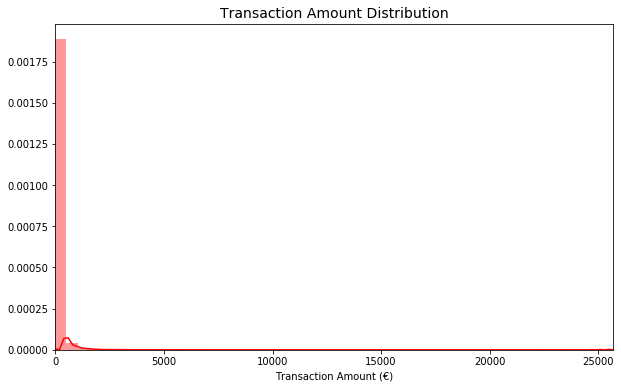

In [44]:
plt.figure(figsize=(10, 6))

#Plot Transaction Amount Distribution
plt.title('Transaction Amount Distribution', size=14)                   #Graph title

#Distplot graph
sns.distplot(a=creditcard['Amount'],                                    #Amount data to plot
             axlabel= 'Transaction Amount (€)',                         #Abscissa label
             bins=50, 
             color='r')         
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data

#Save the graph with plt.savefig
filepath_fig_amount_distributions = os.path.join('graph', 'credit-card-transactions-amount-distributions.jpg')
plt.savefig(filepath_fig_amount_distributions,                          #Image path
            format='jpg',                                               #Image format to save
            bbox_inches='tight')                                        #Keep abscissa legend

plt.show()

Most of amount transactions is lower than 2 000€, however there is amount higher than 25 000€. I suppose that  fraudulent transactions is in this interval. I plot Transaction Amount for fraudulent and non-fraudulent transactions to have more precision :

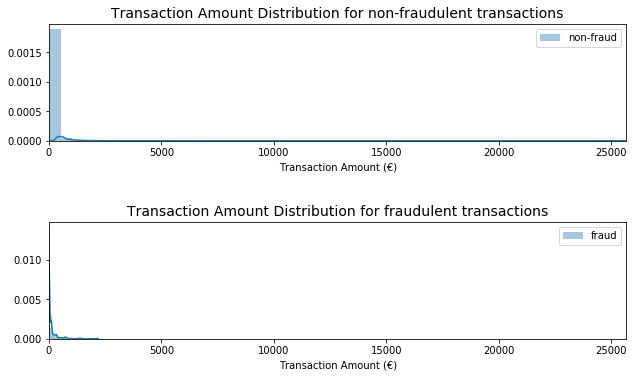

In [7]:
plt.figure(figsize=(10, 6))

#Plot Transaction Amount Distribution for non-fraudulent transactions
plt.subplot(2, 1, 1)
plt.title('Transaction Amount Distribution for non-fraudulent transactions', size=14)    #Graph title

#Countplot for non-fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 0), 'Amount'],
             label='non-fraud',                                         #Curve label
             axlabel= 'Transaction Amount (€)',                         #Abscissa label
             bins=50)                         

plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data
plt.legend()                                                            #Graph legend
plt.tight_layout(pad=5)                                                 #adjust subplot parameters to give specified padding

#Plot Transaction Amount Distribution for fraudulent transactions
plt.subplot(2, 1, 2)
plt.title('Transaction Amount Distribution for fraudulent transactions', size=14)    #Graph title

#Countplot for fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 1), 'Amount'],
             label='fraud',                                             #Curve label
             axlabel= 'Transaction Amount (€)')                         #Abscissa label
        
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data
plt.legend()                                                            #Graph legend

#Save the graph with plt.savefig
filepath_fig_amount_fraud_distributions = os.path.join('graph', 'credit-card-transactions-amout-nonfraud-fraud-distributions.jpg')
plt.savefig(filepath_fig_amount_fraud_distributions,                   #Image path
            format='jpg',                                              #Image format to save
            bbox_inches='tight')                                       #Keep abscissa legend

plt.show()

Fraudulent transactions amount is **150€** in average: :

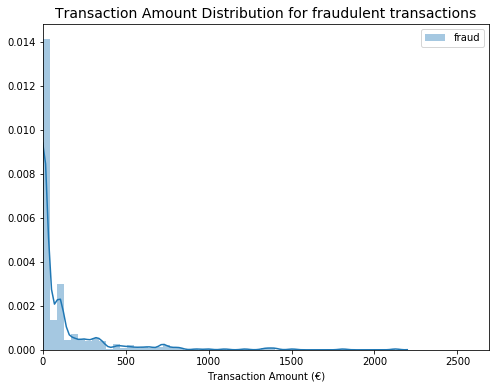

In [9]:
plt.figure(figsize=(8, 6))

#Plot Transaction Amount Distribution for fraudulent transactions
plt.title('Transaction Amount Distribution for fraudulent transactions', size=14)    #Graph title

#Countplot for fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 1), 'Amount'],
             label='fraud',                                               #Curve label
             axlabel= 'Transaction Amount (€)')                           #Abscissa label
        
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount']) - 23000))  #Abscissa interval to plot data
plt.legend()                                                              #Graph legend

#Save the graph with plt.savefig
filepath_fig_amount_fraud_distributions = os.path.join('graph', 'credit-card-transactions-amout-fraud-distributions.jpg')
plt.savefig(filepath_fig_amount_fraud_distributions,                      #Image path
            format='jpg',                                                 #Image format to save
            bbox_inches='tight')                                          #Keep abscissa legend

plt.show()

<h3> Time transactions distribution :

I plot distribution of transaction `Time` :

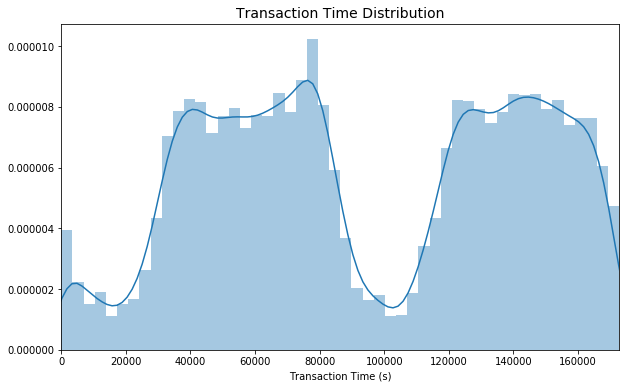

In [12]:
plt.figure(figsize=(10, 6))

#Plot Transaction Time Distribution
plt.title('Transaction Time Distribution', size=14)                   #Graph title

#Graph
sns.distplot(a=creditcard['Time'],                                    #Time data to plot
             axlabel= 'Transaction Time (s)',                         #Abscissa label
             bins=50)         
plt.xlim((min(creditcard['Time']), max(creditcard['Time'])))          #Abscissa interval to plot data

#Save the graph with plt.savefig
filepath_fig_time_distributions = os.path.join('graph', 'credit-card-transactions-time-distributions.jpg')
plt.savefig(filepath_fig_time_distributions,                        #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend

plt.show()

I constat that transactions time is globaly seasonal.

The dataset contains transactions for two days that corresponds to 48 hours (1 hour = 3600s).

In [5]:
max(creditcard['Time']) / 3600

47.99777777777778

I modify `Time` because it's not relevant in second : I transform `Time` from **second** into **hour**.

In [14]:
creditcard['Time'] = creditcard['Time'] / 3600

In [8]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


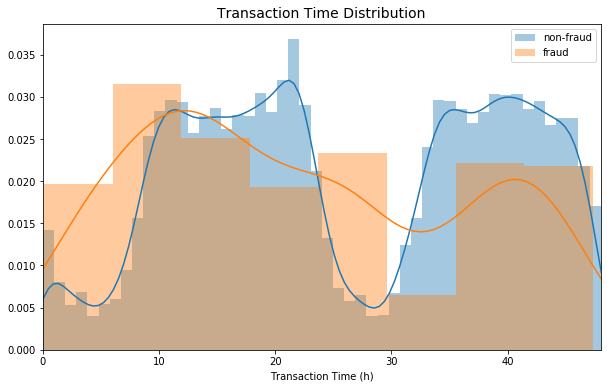

In [16]:
plt.figure(figsize=(10, 6))

#Plot Transaction Time Distribution
plt.title('Transaction Time Distribution', size=14)                   #Graph title

#Countplot for non-fraudulent Transaction Time Distribution
sns.distplot(creditcard.loc[creditcard['Time'].notnull() & (creditcard['Class'] == 0), 'Time'],
             label='non-fraud',                                       #Curve label
             axlabel= 'Transaction Time (h)')                         #Abscissa label

#Countplot for fraudulent Transaction Time Distribution
sns.distplot(creditcard.loc[creditcard['Time'].notnull() & (creditcard['Class'] == 1), 'Time'],
             label='fraud',                                           #Curve label
             axlabel= 'Transaction Time (h)')                         #Abscissa label
        
plt.xlim((min(creditcard['Time']), max(creditcard['Time'])))          #Abscissa interval to plot data
plt.legend()                                                          #Graph legend

#Save the graph with plt.savefig
filepath_fig_time_fraud_distributions = os.path.join('graph', 'credit-card-transactions-time-fraud-distributions.jpg')
plt.savefig(filepath_fig_time_fraud_distributions,                     #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend

plt.show()

I notice that fraudulent transactions increase overnight.

<h3> Features correlation :

Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction : 

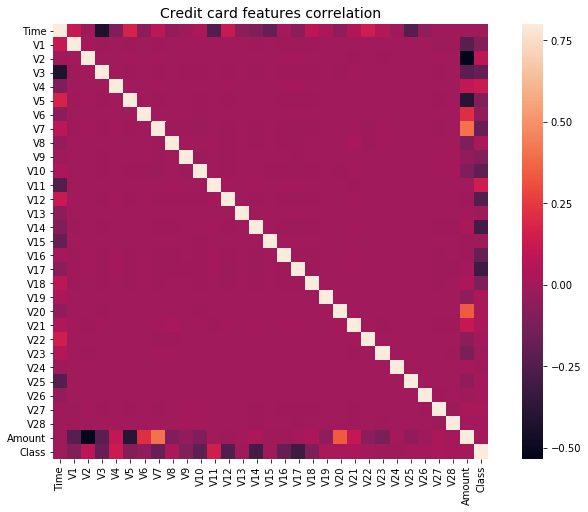

In [35]:
# Correlation matrix
correlation_matrix = creditcard.corr()

#Plot correlation matrix with heatmap
fig = plt.figure(figsize = (12, 8))
plt.title('Credit card features correlation', size=14)                   #Graph title
sns.heatmap(correlation_matrix, vmax = .8, square = True)

#Save the graph with plt.savefig
filepath_fig_correlation = os.path.join('graph', 'credit-card-transactions-correlation-heatmap.jpg')
plt.savefig(filepath_fig_correlation,                                 #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend
plt.show()

In the HeatMap we can clearly see that most of the features don't correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, `V3` and `Time` are negatively correlated. 

<h1> 2. Anomaly Detection

<h2> 2.1 Using Supervised Machine Learning 🤖

Firstly, I build Supervised Machine Learning model to dentify fraudulent credit card transactions and secondly I use Unsupervised Machine Learning to compare results.

<h3> 2.1.1 Features and labels definitions

I select this following features to build `X` :
- `V1`, `V2`, … `V28` : principal components obtained with PCA
- `Time` (in hours): contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- `Amount` (in €) : transaction amount

Labels are `Class` : it takes value 1 in case of fraud and 0 otherwise : it represents `y` 

In [16]:
creditcard.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
X = creditcard.iloc[:, :30]

In [28]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [29]:
y = creditcard['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [30]:
X.shape, y.shape

((283726, 30), (283726,))

I split data into **train** and **test** to build Machine Learning model with `train_test_split` function from scikit-learn :

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,        #train represents 80% of dataset and test represents 20% of dataset
                                                    random_state=0,      #keep the same random split     
                                                    stratify=y)          #conserve the same distributions for labels

In [32]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((226980, 30), (226980,), (56746, 30), (56746,))

<h3> 2.1.2 Scaling and oversampling to improve model performance

<h4> Data Scaling

I use a scaler to have the same scale for data, otherwise one feature will be more relevant than the other, for example transaction `Amount` is higher than `V1` (numerically).

In [33]:
#Instanciate a scaler
scaler = StandardScaler()

#Scale train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 1.5382262 , -0.35232219,  0.65659326, ..., -0.09437867,
         0.07834484, -0.29690349],
       [-0.08737274,  0.66299402, -0.85955375, ..., -0.01610648,
         0.05962701,  0.96538799],
       [-1.96456675, -0.63599585,  0.86313122, ...,  1.55204966,
         1.09724454, -0.33694414],
       ...,
       [-1.12251277, -0.42483153,  0.65699021, ..., -1.75515534,
        -1.21514082, -0.31676203],
       [-0.87813921, -0.86496552, -0.09938969, ...,  0.57318945,
        -0.07551689,  0.14839703],
       [-1.94961842, -0.34697699,  0.50251513, ...,  0.66543954,
        -0.04935022, -0.35312217]])

In [35]:
X_test

array([[ 1.5310889 , -0.23586142,  0.70540469, ...,  0.09724001,
         0.35051484, -0.08250403],
       [ 0.99897058,  0.87965531, -0.59763539, ..., -0.1521426 ,
         0.01561618,  0.31822599],
       [-0.70890731, -0.46505138,  0.38250903, ...,  0.04074202,
         0.11423249, -0.16800497],
       ...,
       [ 1.39619605,  1.04410837, -0.07468128, ..., -0.26875923,
        -0.22076316, -0.20565935],
       [ 0.42623913, -0.06508158,  0.54486019, ...,  0.65664368,
         0.67607343, -0.29649904],
       [-0.52009521, -0.56571534,  0.01831875, ..., -0.12975354,
        -0.13211341, -0.27647872]])

In [36]:
#Save train and test data on local file 
filepath_creditcard_train_test = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard_train_test.pkl')

with open(filepath_creditcard_train_test, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

<h4> Data oversampling

Credit card dataset is highly unbalanced. I use **oversampling** method to balance dataset and improve model performance: **SMOTE** : it consists to create data for fradulent transactions to balance labels for train data).

In [37]:
#Instanciate a SMOTE
oversampling = SMOTE()

#Balance train data
X_train, y_train = oversampling.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

In [39]:
#Transform array into dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['Class'])

In [40]:
X_train_df.shape, y_train_df.shape

((453204, 30), (453204, 1))

I plot `Class` distribution for fraudulent and non fraudulent transactions after oversampling : 

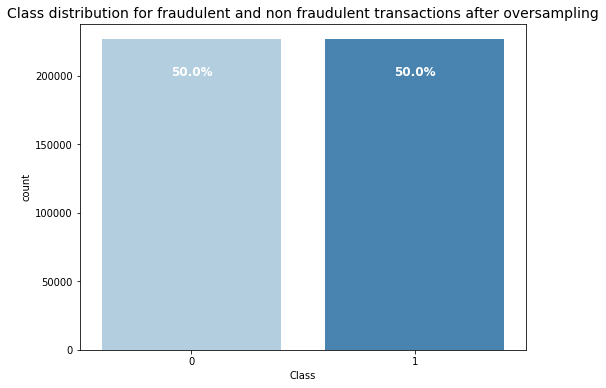

In [3]:
plt.figure(figsize=(8, 6))

#Plot the Class distributions for fraudulent and non fraudulent transactions
plt.title('Class distribution for fraudulent and non fraudulent transactions after oversampling', size=14)       #Graph title

#Countplot graph
sns.countplot(x='Class',                                                                      #Data to plot : Class    
              data=y_train_df,
              palette="Blues")                                                                

#Write the Class percentage on top
grouped_values = (y_train_df.Class.value_counts() / y_train_df.Class.shape[0]) * 100          #Compute Class percentage
for label, value in enumerate(grouped_values):
    plt.text(label,                                                                           #Class index
             value + 200000,                                                                  #Class percentage position
             str(round(value,2)) + '%',                                                       #Class percentage to print
             ha="center",                                                                     #Center Class percentage label
             fontweight='bold',                                                               #Text property
             color='white',                                                                   #Text property
             fontsize=12)                                                                     #Text property

#Save the graph with plt.savefig
filepath_fig_fraud_distributions_oversampled = os.path.join('graph', 'credit-card-fraud-transactions-distributions-oversampled.jpg')
plt.savefig(filepath_fig_fraud_distributions_oversampled,                                     #Image path
            format='jpg',                                                                     #Image format to save
            bbox_inches='tight')                                                              #Keep abscissa legend

plt.show()

<h4> Data save

In [44]:
#Save train and test data on local file 
filepath_creditcard_train_test_supervised = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard_train_test-supervisedML.pkl')

with open(filepath_creditcard_train_test_supervised, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test, X_train_df, y_train_df), f)

<h4> Data visualization

I realize some 3D visualization of data thank to scaling :

In [54]:
X_train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.538226,-0.352322,0.656593,0.109462,-0.673571,1.157784,-0.769255,1.408941,-0.323953,-0.812062,...,-0.035821,0.127059,0.299187,-1.113634,-1.125925,2.522966,0.000523,-0.094379,0.078345,-0.296903
1,-0.087373,0.662994,-0.859554,-0.226601,0.604573,-0.550365,0.466115,-0.375811,0.072372,2.528512,...,0.576507,-0.142423,-0.600091,0.095386,1.075355,-0.766413,-2.051121,-0.016106,0.059627,0.965388
2,-1.964567,-0.635996,0.863131,0.807986,-0.550419,-0.166970,-0.705882,0.592917,-0.000870,0.575992,...,0.491306,-0.398559,-0.656941,-0.069740,0.640154,-0.141581,0.636437,1.552050,1.097245,-0.336944
3,1.500455,1.168727,-0.663744,-1.312122,-2.022626,-0.219073,-0.645048,-0.266915,-0.342646,0.932746,...,-0.617335,-0.081142,0.925182,-0.212830,0.252670,1.094539,-1.026591,0.150832,-0.149923,-0.265397
4,0.671329,-2.210194,-2.424503,-0.527908,-1.842922,2.052265,2.049696,-0.138479,1.354355,0.231393,...,2.481443,0.510367,-1.494512,1.534702,1.102079,1.146437,0.556514,-0.065128,-1.228868,1.622621


fig = plt.figure()
ax = plt.axes(projection='3d')

sns.scatterplot(X_train_df.Time, X_train_df.V1, X_train_df.V2)

#ax.plot_wireframe(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], X_train_df.iloc[:, 2])
#ax.set_title('wireframe');

<h3> 2.1.3 Modeling

In [9]:
#Import train and test from local file
filepath_creditcard_train_test_supervised = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard_train_test-supervisedML.pkl')

with open(filepath_creditcard_train_test_supervised, 'rb') as f:
    X_train, X_test, y_train, y_test, X_train_df, y_train_df = pickle.load(f)

In [4]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((453204, 30), (453204,), (56746, 30), (56746,))

In [5]:
y_train.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

<h4> Logistic Regression

In [4]:
def get_logistic_regression(C=1.0):
    '''
    This function predicts Class transactions with Logistic Regression model
    
    Parameters
    ------------
    C : float, default=1.0
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.
        
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    lr = LogisticRegression(C=C)
    
    #Model fitting
    print('Logistic Regression time to fit :')
    %time
    lr.fit(X_train, y_train)

    #Model predictions
    print('\n Logistic Regression time to predict y :')
    %time
    y_pred = lr.predict(X_test)
    print('\n Logistic Regression time to predict y proba :')
    %time
    y_pred_proba = lr.predict_proba(X_test)

    return y_pred, y_pred_proba

In [35]:
#Prediction for C=1.0
y_pred_lr, y_pred_proba_lr = get_logistic_regression(C=1.0)

Logistic Regression time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

 Logistic Regression time to predict y :
CPU times: user 18 µs, sys: 1e+03 ns, total: 19 µs
Wall time: 12.6 µs

 Logistic Regression time to predict y proba :
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 8.34 µs


In [36]:
#Compute accuracy score C=1.0
acc_lr = round(accuracy_score(y_test, y_pred_lr), 4) * 100
acc_lr

97.23

In [64]:
#Compute score for C=1.0
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [37]:
#Prediction for C=0.1
y_pred_lr_c_01, y_pred_proba_lr_c_01 = get_logistic_regression(C=0.1)

Logistic Regression time to fit :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y :
CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y proba :
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 7.87 µs


In [38]:
#Compute accuracy score for C=0.1
acc_lr_c_01 = round(accuracy_score(y_test, y_pred_lr_c_01), 4) * 100
acc_lr_c_01

97.24000000000001

In [39]:
#Compute score for C=0.1
print(classification_report(y_test, y_pred_lr_c_01))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [5]:
#Prediction for C=0.01
y_pred_lr_c_001, y_pred_proba_lr_c_001 = get_logistic_regression(C=0.01)

Logistic Regression time to fit :
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y :
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs

 Logistic Regression time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


In [10]:
#Compute accuracy score for C=0.01
acc_lr_c_001 = round(accuracy_score(y_test, y_pred_lr_c_001), 4) * 100
acc_lr_c_001

97.26

In [11]:
#Compute score for C=0.01
print(classification_report(y_test, y_pred_lr_c_001))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



<h5> ROC Curve

In [43]:
#Compute ROC characteristic
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr[:, 1])
fpr_lr_c_01, tpr_lr_c_01, threshold_lr_c_01 = roc_curve(y_test, y_pred_proba_lr_c_01[:, 1])
fpr_lr_c_001, tpr_lr_c_001, threshold_lr_c_001 = roc_curve(y_test, y_pred_proba_lr_c_001[:, 1])

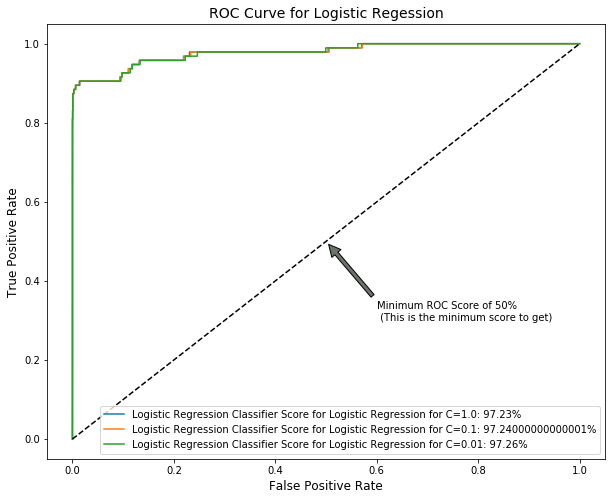

In [46]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Logistic Regression
plt.title('ROC Curve for Logistic Regession', fontsize=14)                    #ROC Curve graph Title

#Plot ROC Curve for Logistic Regression for C=1.0
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression Classifier Score for Logistic Regression for C=1.0: {acc_lr}%')

#Plot ROC Curve for Logistic Regression for C=0.1
plt.plot(fpr_lr_c_01, tpr_lr_c_01, label=f'Logistic Regression Classifier Score for Logistic Regression for C=0.1: {acc_lr_c_01}%')   

#Plot ROC Curve for Logistic Regression for C=0.01
plt.plot(fpr_lr_c_001, tpr_lr_c_001, label=f'Logistic Regression Classifier Score for Logistic Regression for C=0.01: {acc_lr_c_001}%')

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph property
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_lr = os.path.join('graph', 'credit-card-fraud-roc-curve-lr.jpg')
plt.savefig(filepath_roc_curve_lr,                                                       #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

<h4> Random Forest Classifier

In [3]:
def get_random_forest_classifier(n_estimators=100, max_depth=50):
    '''
    This function predicts Class transactions with Random Forest Classifier model
    
    Parameters
    ------------
    n_estimators : integer, optional (default=100)
        The number of trees in the forest.
    max_depth : integer or None, optional (default=50)
        The maximum depth of the tree. 
        
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    #Model fitting
    print('Random Forest Classifier time to fit :')
    %time
    rf.fit(X_train, y_train)

    #Model predictions
    print('\n Random Forest Classifier time to predict y :')
    %time
    y_pred = rf.predict(X_test)
    print('\n Random Forest Classifier time to predict y proba :')
    %time
    y_pred_proba = rf.predict_proba(X_test)

    return y_pred, y_pred_proba

In [4]:
#Prediction for n_estimators=100, max_depth=50
y_pred_rf, y_pred_proba_rf = get_random_forest_classifier(n_estimators=100, max_depth=50)

Random Forest Classifier time to fit :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs

 Random Forest Classifier time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [15]:
#Compute accuracy score for n_estimators=100, max_depth=50
acc_rf = round(accuracy_score(y_test, y_pred_rf), 4) * 100
acc_rf

99.96000000000001

In [6]:
#Compute score for n_estimators=100, max_depth=50
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.83      0.87        95

    accuracy                           1.00     56746
   macro avg       0.95      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746



In [17]:
#Prediction for n_estimators=100, max_depth=None
y_pred_rf_depth_none, y_pred_proba_rf_depth_none = get_random_forest_classifier(n_estimators=100, max_depth=None)

Random Forest Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

 Random Forest Classifier time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [18]:
#Compute accuracy score for n_estimators=100, max_depth=None
acc_rf_depth_none = round(accuracy_score(y_test, y_pred_rf_depth_none), 4) * 100
acc_rf_depth_none

99.96000000000001

In [25]:
print(classification_report(y_test, y_pred_rf_depth_none))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.93      0.84      0.88        95

    accuracy                           1.00     56746
   macro avg       0.96      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [19]:
#Prediction for n_estimators=50, max_depth=None
y_pred_rf_est_50, y_pred_proba_rf_est_50 = get_random_forest_classifier(n_estimators=50, max_depth=None)

Random Forest Classifier time to fit :
CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 14.1 µs

 Random Forest Classifier time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs


In [22]:
#Compute accuracy score for n_estimators=50, max_depth=None
acc_rf_est_50 = round(accuracy_score(y_test, y_pred_rf_est_50), 4) * 100
acc_rf_est_50

99.96000000000001

In [26]:
#Compute score for n_estimators=50, max_depth=None
print(classification_report(y_test, y_pred_rf_est_50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.83      0.87        95

    accuracy                           1.00     56746
   macro avg       0.96      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746



<h5> ROC Curve

In [28]:
#Compute ROC characteristic
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])
fpr_rf_depth_none, tpr_rf_depth_none, threshold_rf_depth_none = roc_curve(y_test, y_pred_proba_rf_depth_none[:, 1])
fpr_rf_est_50, tpr_rf_est_50, threshold_rf_est_50 = roc_curve(y_test, y_pred_proba_rf_est_50[:, 1])

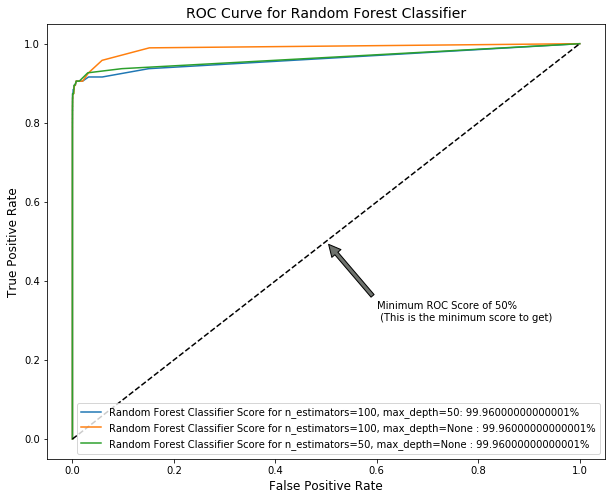

In [30]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Random Forest Classifier 
plt.title('ROC Curve for Random Forest Classifier', fontsize=14)                         #ROC Curve graph Title

#Plot ROC Curve for Random Forest Classifier for n_estimators=100, max_depth=50
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier Score for n_estimators=100, max_depth=50: {acc_rf}%')           

#Plot ROC Curve for Random Forest Classifier for n_estimators=100, max_depth=None
plt.plot(fpr_rf_depth_none, tpr_rf_depth_none, label=f'Random Forest Classifier Score for n_estimators=100, max_depth=None : {acc_rf_depth_none}%')           

#Plot ROC Curve for Random Forest Classifier for n_estimators=50, max_depth=None
plt.plot(fpr_rf_est_50, tpr_rf_est_50, label=f'Random Forest Classifier Score for n_estimators=50, max_depth=None : {acc_rf_est_50}%')            

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph properties
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_rf = os.path.join('graph', 'credit-card-fraud-roc-curve-rf.jpg')
plt.savefig(filepath_roc_curve_rf,                                                       #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

<h4> Support Vector Machine Classifier

In [47]:
def get_support_vector_machine(C=1.0, kernel='rbf', gamma='scale'):
    '''
    This function predicts Class transactions with Support Vector Machine Classifier model
    
    Parameters
    ------------
    C : float, optional (default=1.0)
        Regularization parameter. The strength of the regularization is
        inversely proportional to C. Must be strictly positive. The penalty
        is a squared l2 penalty.
    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
        a callable.
    gamma : {'scale', 'auto'} or float, optional (default='scale')
        Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
        
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    svc = SVC(C=C, kernel=kernel, gamma=gamma, random_state=0, probability=True)
    
    #Model fitting
    print('Support Vector Machine Classifier time to fit :')
    %time
    svc.fit(X_train, y_train)

    #Model predictions
    print('\n Support Vector Machine Classifier time to predict y :')
    %time
    y_pred = svc.predict(X_test)
    print('\nSupport Vector Machine Classifier time to predict y proba :')
    %time
    y_pred_proba = svc.predict_proba(X_test)

    return y_pred, y_pred_proba

In [ ]:
#Prediction for C=1.0, kernel='rbf', gamma='scale'
y_pred_svc, y_pred_proba_svc = get_support_vector_machine(C=1.0, kernel='rbf', gamma='scale')

Support Vector Machine Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
#Compute accuracy score for C=1.0, kernel='rbf', gamma='scale'
acc_svc = round(accuracy_score(y_test, y_pred_svc), 4) * 100
acc_svc

In [ ]:
print(classification_report(y_test, y_pred_svc))

<h5> ROC Curve

In [ ]:
#Compute ROC characteristic
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, y_pred_proba_svc[:, 1])

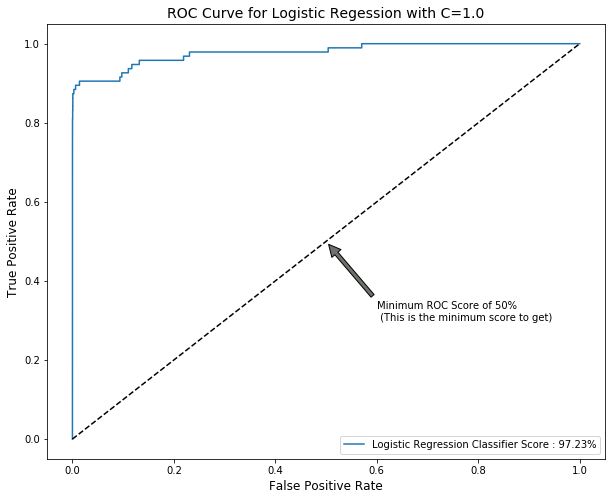

In [51]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Support Vector Machine Classifier
plt.title('ROC Curve for Support Vector Machine Classifier', fontsize=14)                #ROC Curve graph Title

plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine Classifier Score : {acc_svc}%')#Graph

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph property
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_lr = os.path.join('graph', 'credit-card-fraud-roc-curve-lr.jpg')
plt.savefig(filepath_roc_curve_lr,                                                       #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

<h2> 2.2 Using Unsupervised Machine Learning 🤖

I import data scaling from the last part and I use unsupervised Machine Learning Model :

In [62]:
#Import train and test data on local file
filepath_creditcard_train_test = os.path.join('..', '..', '..', '..', '..', 'data', 'creditcard_train_test.pkl')

with open(filepath_creditcard_train_test, 'rb') as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

<h3> 2.2.1 Gaussian Distribution based

In [23]:
def get_gaussian_distribution_based():
    '''
    This function predicts Class transactions with Gaussian Distribution based model
    
    Parameters
    ------------

    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    covariance = EllipticEnvelope(random_state=0)
    
    #Model fitting and predictions
    print('Gaussian Distribution based time to fit :')
    %time
    covariance.fit_predict(X_train)

    #Model predictions
    #print('\nGaussian Distribution based time to predict y :')
    #%time
    #y_pred = covariance.predict(X_test)
    print('\nGaussian Distribution based time to predict y proba :')
    %time
    y_pred_proba = covariance.predict_proba(X_test)

    return y_pred, y_pred_proba

In [ ]:
def get_gaussian_distribution_based():
    covariance = EllipticEnvelope(random_state=0)               #Instanciate model
    
    print('Fitting Time :\n')                                                  #Time computation to fit
    %time
    covariance.fit(X_train)                                                    #Model fitting
    y_pred = covariance.predict(X_test)                                        #Model prediction
    
    return y_pred

y_pred_covariance = get_gaussian_distribution_based()
print(classification_report(y_test, y_pred))

In [95]:
print(classification_report(y, y_pred))

/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    283253
           1       0.00      0.14      0.00       473

    accuracy                           0.00    283726
   macro avg       0.00      0.05      0.00    283726
weighted avg       0.00      0.00      0.00    283726



plt.figure()

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)

plt.show()

In [93]:
y_score = cov.score_samples(X_scaled)

<h3> ROC Curve

In [94]:
fpr, tpr, threshold = roc_curve(y, y_score)

In [ ]:
plt.figure()

plt.plot(fpr, tpr)

plt.show()

My model can't be use for frauduldent data in my X_train

<h2> 2.4 Local Outlier Factor (LOF)

def get_local_outlier_factor():
     '''
    This function predicts data with Local Outlier Factor model
    
    Parameters
    ------------

    Returns
    ------------
    y_pred : array of int
        contains prediction for fraudulent of non-fraudlent transactions
    '''
    local_outlier = LocalOutlierFactor(novelty=False)               #Instanciate model
    
    print('Fitting Time :\n')                                       #Time computation to fit
    %time 
    
    #Model fitting and prediction
    return local_outlier.fit_predict(X_train)

In [98]:
loc = LocalOutlierFactor(novelty=False)

In [ ]:
%time
loc.fit_predict(X_scaled)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs


/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


<h3> ROC Curve

In [ ]:
y_score_lof = loc.score_samples()

In [ ]:
fpr_lof, tpr_lof, threshold_lof = roc_curve(y, y_score_lof)

In [ ]:
plt.figure()

plt.plot(fpr_lof, tpr_lof)

plt.show()

<h2> 2.5 Isolation Forest

In [ ]:
isol_forest = IF()